In [1]:
import numpy as np
import queue
import itertools as it
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
#Receives a list that represents the state: [n1,n2,...] where n1 != n2!= ...
def equal_state(state1,state2):
    rows = len(state1)
    columns = len(state1[0])
    for row in range(0,rows):
        for column in range(0, columns):
            if not(state1[row][column]==state2[row][column]):
                #print(str(state1[row][column])+""+str(state2[row][column]))
                return False
    return True

#Receives a matrix that represents the state: [n1,n2,...] where n1 != n2!= ...
def goaltest(state,path):
    for p in range(0,len(path)):
        #print("goal: "+str(goal))
        if(equal_state(state,path[p])):
            return True
    return False

def printBoard(arr_solution):
    if arr_solution != []:
        temp_solution = list(it.chain(*arr_solution))

        width  = len(arr_solution)
        height = len(arr_solution[0]) 
        
        puzzle = np.zeros((width,height))
        puzzle[1::2,0::2] = 1
        puzzle[0::2,1::2] = 1

        plt.imshow(puzzle, cmap='binary')
        
        for i in range(0,width):
            for j in range(0,height):
                character = str(arr_solution[i][j])
                plt.text(j, i, character, fontsize=20, ha='center', va='center', color='black' if (i - j) % 2 == 0 else 'white')
        plt.show()

In [3]:
def get_element_position(state,value):
    rows = len(state)
    columns = len(state[0])
    for row in range(0,rows):
        for column in range(0, columns):
            if(value == state[row][column]):
                return row,column

def swap_elements_by_position(state,el1,el2):
    tempval = state[el1[0]][el1[1]]
    state[el1[0]][el1[1]] = state[el2[0]][el2[1]]
    state[el2[0]][el2[1]] = tempval
    return state

In [4]:
#Expands the actual node, returns a list of states
def expand(state):
    expanded = []    
    
    i,j = get_element_position(state,0)
    blank_pos = [i,j]
              # [V+,H+,V-,H-]
              # [up,right,down,left]
    movements = [i-1,j+1,i+1,j-1]
    names = ["ARRIBA","DERECHA","ABAJO","IZQUIERDA"]
    
    for mov_index in range(0,4):
        move = movements[mov_index]
        if not(move > 2 or move < 0):
            #print(names[mov_index])
            #print("mov_index: "+str(mov_index)+" PASA: "+str(move)+" state[0,move]:"+str(t[0][move])+" state[move,0]:"+str(t[move][0]))
            temporal = np.array(state)
            #Vertical
            if(mov_index%2 == 0):
                something = swap_elements_by_position(temporal,blank_pos,[move,j])
                #print("Cae en SI "+str(mov_index)+" "+str(t))
            #Horizontal
            else:
                something = swap_elements_by_position(temporal,blank_pos,[i,move])
                #print("Cae en NO "+str(mov_index)+" "+str(t))
            
            expanded.append(something.tolist())
            #print(expanded)
    return expanded

In [5]:
def addtoQueue(queue_,list_of_lists):
    for l in list_of_lists:
        queue_.put(l)

def printQueue(queue_,elem_limit):
    queue_= list(queue_.queue)
    if len(queue_)<elem_limit:
        print("frontier = "+str(np.array(queue_)))
def concat_paths(main,solution):
    #Elminate tail
    main.pop()
    #solution.pop()
    #Flip the solution path and concatenate it with the main path
    return np.concatenate((main, np.flip(solution,axis=0).tolist()), axis=0)

In [6]:
# MAIN ALGORITHM
cost=1
main_path     = []
solution_path = []
def BFS(frontier,solution_frontier):
    global cost,main_path,solution_path
    act_element = frontier.get()
    sol_element = solution_frontier.get()
    print("\n\t"+str(cost)+". ======== MAIN STATE ========")
    printBoard(act_element)
    
    print("\n\t"+str(cost)+". ======== SOLUTION STATE ========")
    printBoard(sol_element)
    
    main_path.append(act_element)
    solution_path.append(sol_element)
    
    if goaltest(act_element,solution_path):
        complete_path = concat_paths(main_path,solution_path)
        print("The state "+str(act_element)+" was found in the solution path: ")
        for state in complete_path:
            printBoard(list(state))
        main_path = []
        solution_path = []
        return
    
    if goaltest(sol_element,main_path):
        complete_path = concat_paths(main_path,solution_path)
        print("The solution "+str(sol_element)+" was found in the main path: "+str(main_path))
        for state in complete_path:
            printBoard(list(state))
        main_path = []
        solution_path = []
        return
    
    main_offspring = expand(act_element)
    print("======== NEXT STEP ========")
    sol_offspring = expand(sol_element)
    #print("===== MAIN offspring =====")
    #print(str(np.array(main_offspring)))
    #print("===== SOLUTION offspring =====")
    #print(str(np.array(sol_offspring)))
    
    addtoQueue(frontier,main_offspring)
    addtoQueue(solution_frontier,sol_offspring)
    #printQueue(frontier,30)
    cost+=1
    BFS(frontier,solution_frontier)


	1. ======== MAIN STATE ========


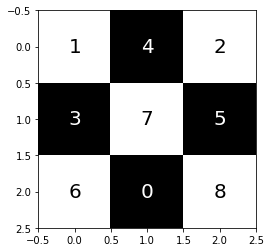


	1. ======== SOLUTION STATE ========


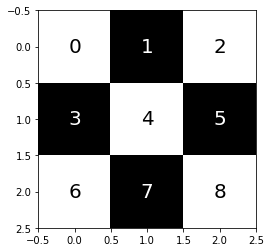

======== NEXT STEP ========

	2. ======== MAIN STATE ========


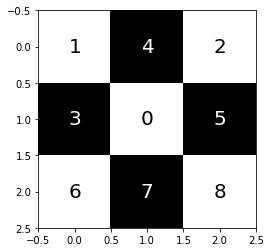


	2. ======== SOLUTION STATE ========


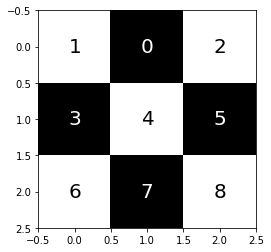

======== NEXT STEP ========

	3. ======== MAIN STATE ========


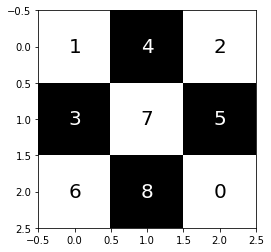


	3. ======== SOLUTION STATE ========


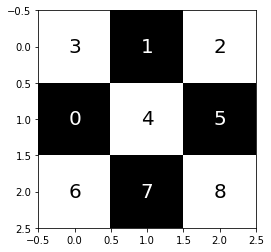

======== NEXT STEP ========

	4. ======== MAIN STATE ========


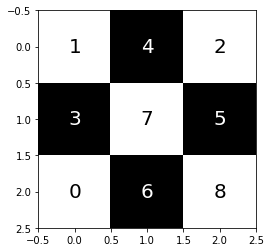


	4. ======== SOLUTION STATE ========


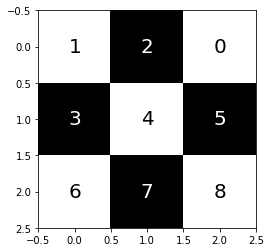

======== NEXT STEP ========

	5. ======== MAIN STATE ========


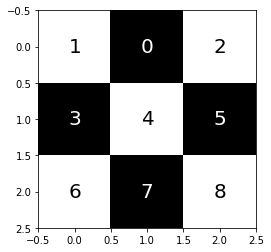


	5. ======== SOLUTION STATE ========


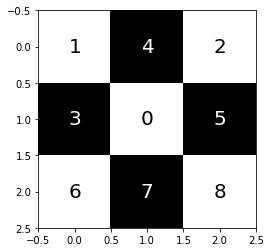

The state [[1, 0, 2], [3, 4, 5], [6, 7, 8]] was found in the solution path: 


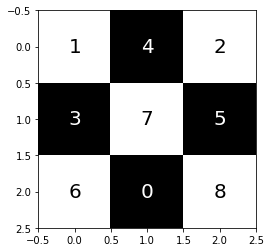

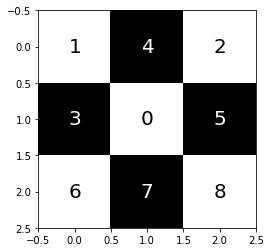

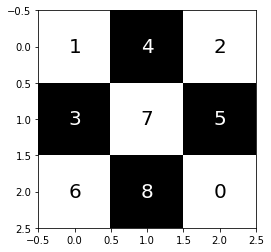

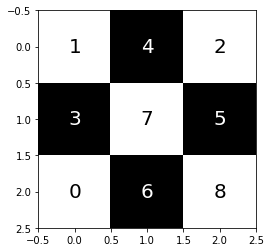

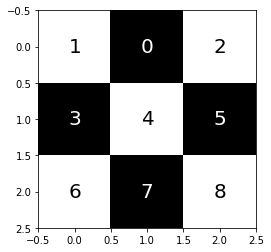

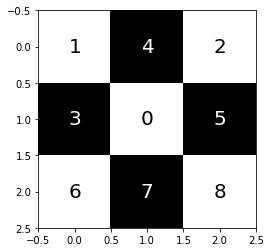

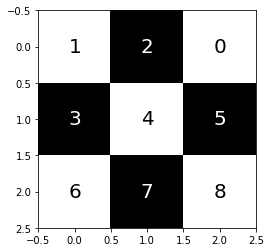

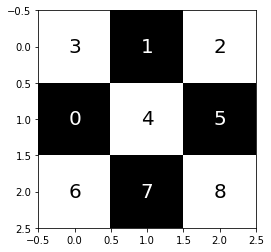

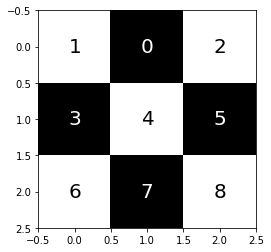

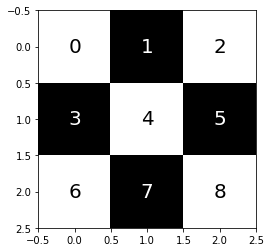

5 iterations were done.


In [7]:
front = queue.Queue()
front.put([[1,4,2],
           [3,7,5],
           [6,0,8]])#[1,1,1,1])
solution = queue.Queue()
solution.put([[0,1,2],
              [3,4,5],
              [6,7,8]])

BFS(front,solution)
print(str(cost)+" iterations were done.")
cost = 0
front.queue.clear()
solution.queue.clear()